# Домашнее задание 3 - PANDAS




## 1. Табличные данные и Pandas

In [110]:
#%pylab inline
# import almost all we need
import pandas as pd
import numpy as np

Данные находятся в приложенном файле `chipotle.tsv`

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [2]:
# your code
pass_data = pd.read_csv('chipotle.tsv', sep='\t')
pass_data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [3]:
pass_data['order_id'].tail(1)

,order_id
4621,1834


In [4]:
len(set(pass_data['item_name']))

50

#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках?

In [5]:
for i in list(pass_data.columns):
  if (any(pass_data[i].isnull())):
    print(i)

choice_description


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [108]:
for i in range(len(pass_data['choice_description'])):
  try:
    if type(pass_data['choice_description'][i]) == type(6.1):
      pass_data['choice_description'][i] = ''
  except Exception:
    continue



In [109]:
pass_data.tail(10)

,order_id,quantity,item_name,choice_description,item_cost,date,sum_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25,2018-01-08,12.90
4613,1831,1,Chips,,2.15,2018-01-08,12.90
4614,1831,1,Bottled Water,,1.50,2018-01-08,12.90
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75,2018-01-06,13.20
4616,1832,1,Chips and Guacamole,,4.45,2018-01-06,13.20
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-09,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-09,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-03,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-03,28.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75,2018-01-03,28.75


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [8]:
print(type(pass_data['item_price'][0]))

<class 'str'>


In [9]:
def make_float_price(name):
    return float(name[1:])

pri = pass_data['item_price'].apply(make_float_price)
pri.head()

,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


In [10]:
pass_data['item_cost'] = pri
pass_data.head()

,order_id,quantity,item_name,choice_description,item_price,item_cost
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


Какая средняя/минимальная/максимальная цена у товара?

In [11]:
print(pass_data['item_cost'].mean())
print(pass_data['item_cost'].max())
print(pass_data['item_cost'].min())

7.464335785374297
44.25
1.09


Удалите старую колонку с ценой.

In [12]:
pass_data.drop('item_price', axis=1, inplace=True)
pass_data.head()

,order_id,quantity,item_name,choice_description,item_cost
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [13]:
low = pass_data.sort_values(by=['item_cost'], ascending=True).drop_duplicates(subset=['item_name'])
low.head()

,order_id,quantity,item_name,choice_description,item_cost
34,17,1,Bottled Water,,1.09
53,24,1,Canned Soda,[Sprite],1.09
4601,1827,1,Canned Soft Drink,[Diet Coke],1.25
1834,742,1,Side of Chips,,1.69
4509,1793,1,Chips,,1.99


In [14]:
high = pass_data.sort_values(by=['item_cost'], ascending=False).drop_duplicates(subset=['item_name'])
high.head()

,order_id,quantity,item_name,choice_description,item_cost
3598,1443,15,Chips and Fresh Tomato Salsa,,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [16]:
# your code
chicken = pass_data[pass_data['item_name'] == 'Chicken Bowl'].groupby('item_name')['quantity']
chicken.value_counts()

item_name     quantity
Chicken Bowl  1           693
              2            31
              3             2
Name: count, dtype: int64

#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [21]:
# your code
chek = pass_data.groupby('order_id')['item_cost'].sum()
chek.mean()

np.float64(18.811428571428568)

#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [22]:
# your code
a = pass_data[pass_data['quantity'] < 2].groupby('order_id')['quantity'].value_counts()
len(a[a == 1])

102

#### 9. [0.25 баллов] Какая самая популярная категория товара?

In [24]:
# your code
m = pass_data.groupby('item_name')['quantity'].sum()
m[m == m.max()]

,quantity
item_name,
Chicken Bowl,761


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [25]:
# your code
b = []
for item in pass_data['item_name'].unique():
  if 'Burrito' in item:
    b.append(item)
b

['Steak Burrito',
 'Chicken Burrito',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Veggie Burrito',
 'Burrito']

In [26]:
m = pass_data[pass_data['item_name'].isin(b)].groupby('item_name')['quantity'].sum()
m[m == m.max()]

,quantity
item_name,
Chicken Burrito,591


In [31]:
p = pass_data[pass_data['item_name'].isin(b)].groupby('item_name')['item_cost'].max()
p[p == p.max()]

,item_cost
item_name,
Chicken Burrito,35.0


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [58]:
# your code
a = pass_data.groupby('order_id')['item_cost'].transform('sum')
pass_data['sum_price'] = a
b = pass_data[pass_data['item_cost'] > 0.4 * pass_data['sum_price']].groupby('order_id').sum()
len(b)

1624

#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [45]:
# your code
coke = pass_data[pass_data['choice_description'].str.contains('Diet Coke')]
(len(coke["item_cost"])*0.1)/(coke["item_cost"].sum()+len(coke["item_cost"])*0.1)

np.float64(0.0393990179647761)

#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [52]:
# your code
matrix = [
    ['Убийственный класс', '(комедия/боевик)'],
    ['Стальной Алхимик: Братство', '(боевик)'],
    ['Саики Кусуо', '(комедия)'],
    ['Твоя апрельская ложь', '(романтика/драма)'],
    ['Нитидзё', '(комедия)'],
    ['Steins;Gate', '(фантастика/триллер)'],
    ['Хоримия', '(романтика)'],
    ['Моя геройская академия', '(комедия/боевик)'],
    ['Fate/Zero', '(триллер/боевик)'],
    ['Корзинка фруктов', '(романтика)'],
    ['Плутон', '(триллер/боевик)'],
    ['Галактика Татами', '(комедия/фантастика)'],
    ['Атака титанов', '(боевик/триллер)'],
    ['Ковбой Бибоп', '(фантастика/боевик)'],
    ['Шова Генроку Ракуго Синдзю', '(драма)']
]
matrix = np.matrix(matrix)
matrix = matrix.T
column1 = matrix[0].tolist()[0]
column2 = matrix[1].tolist()[0]


In [106]:
# your code
df_ = pd.DataFrame({
    'index': list(map(lambda x: x+1, range(len(column1)))),
    'column1': column1,
    'column2': column2
}, )
df_

,index,column1,column2
0,1,Убийственный класс,(комедия/боевик)
1,2,Стальной Алхимик: Братство,(боевик)
2,3,Саики Кусуо,(комедия)
3,4,Твоя апрельская ложь,(романтика/драма)
4,5,Нитидзё,(комедия)
5,6,Steins;Gate,(фантастика/триллер)
6,7,Хоримия,(романтика)
7,8,Моя геройская академия,(комедия/боевик)
8,9,Fate/Zero,(триллер/боевик)
9,10,Корзинка фруктов,(романтика)


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [107]:
df_.to_csv('anime.csv', encoding='utf-8', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [60]:
#%matplotlib inline  # нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [74]:
import datetime
import random

df = pass_data
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])


,order_id,quantity,item_name,choice_description,item_cost,date,sum_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-12,11.56
1,1,1,Izze,[Clementine],3.39,2018-01-12,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-12,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2018-01-12,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-26,16.98
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-09,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-09,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-03,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-03,28.75


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

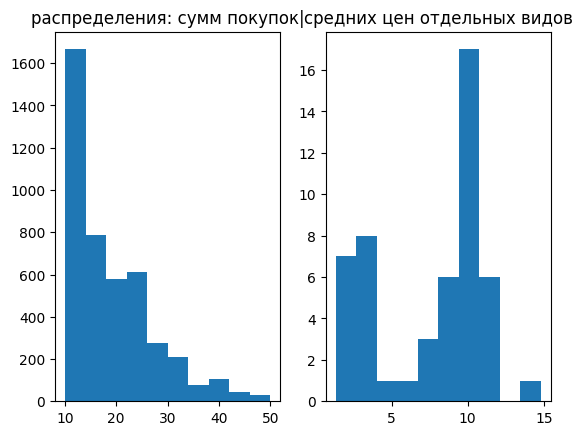

In [85]:
# your code
fig, (a1,a2) = plt.subplots(1, 2)
a1.hist(df[df['sum_price'] < 50]['sum_price'])
a1.set_title("распределения: сумм покупок|")
a2.hist([(df[df['item_name'] == name]['item_cost'].mean()) for name in list(df['item_name'].unique())])
a2.set_title("средних цен отдельных видов")
plt.show()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

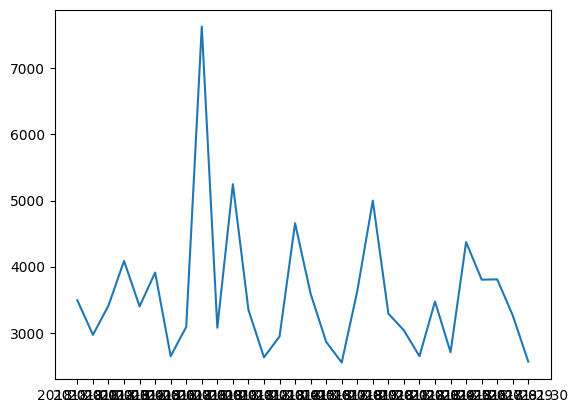

In [92]:
# your code
a = df.groupby(df['date'])['sum_price'].sum()
plt.plot(a)
plt.show()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

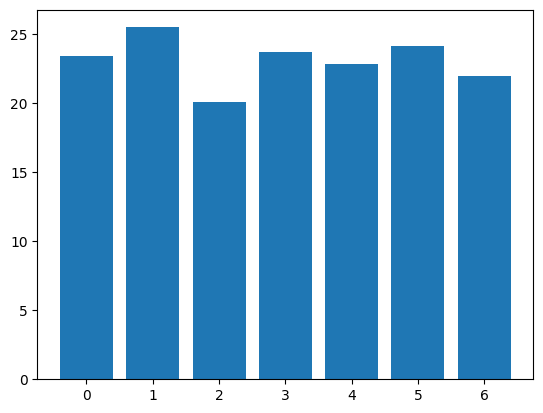

In [97]:
# your code
g = df.groupby(pd.to_datetime(df['date']).dt.dayofweek)['sum_price'].mean()
g = g.reset_index()
plt.bar(g['date'], g['sum_price'])
plt.show()

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

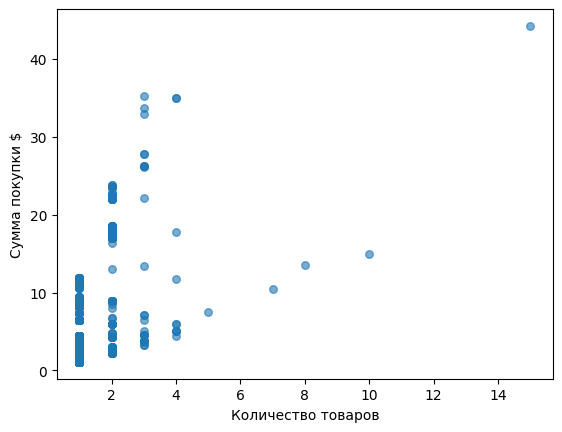

In [99]:
# your code
plt.scatter(df['quantity'], df['item_cost'], alpha=0.6, s=30)
plt.xlabel('Количество товаров')
plt.ylabel('Сумма покупки $')
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

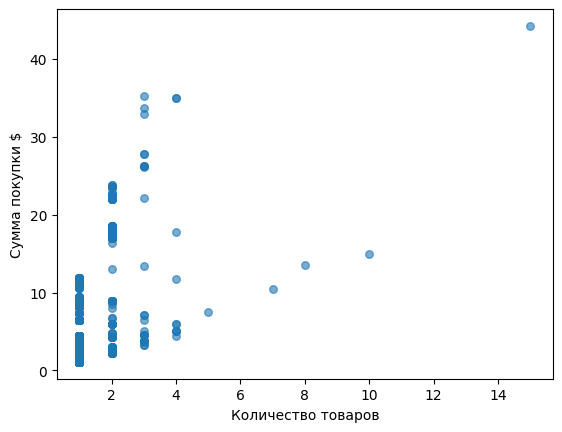

In [101]:
# your code
plt.scatter(df['quantity'], df['item_cost'], alpha=0.6, s=30)
plt.xlabel('Количество товаров')
plt.ylabel('Сумма покупки $')
plt.savefig('scatter_plot.pdf')

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.